# Changes in Real M2, Personal Consumption Expenditures (PCE), and CPI
Analysis of annual changes in Real M2, Personal Consumption Expenditures, and CPI. Whereever possible I make use of data series with quarterly frequencies provided by FRED. In cases where only monthly freqencies are available, I downsample to a quarter start by taking the average over the quarter.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import pandas_datareader.data as web
from datetime import date

In [2]:
report_start = date.fromisoformat('1959-01-01')
report_end = date.today()

### Get M2, PCE, and CPI data
I use the following dataseries provided by [FRED](https://fred.stlouisfed.org/):
* `M2REAL`&mdash; Real M2 Money Stock in billions of 1982-84 Dollars, seasonally adjusted (monthly frequency)
* `PCECC96` &mdash; Real Personal Consumption Expenditures in billions of Chained 2012 Dollars, seasonally adjusted (quarterly frequency)
* `CPIAUCSL` &mdash; Consumer Price Index for All Urban Consumers, Index 1982-1984=100, seasonally adjusted (monthly frequency)

In [3]:
m2_cpi = web.get_data_fred(['M2REAL', 'CPIAUCSL'], start=report_start, end=report_end)

# Downsampling to quarterly frequency to be consistent with PCE frequency
m2_cpi = m2_cpi.resample('QS').mean()

pce = web.get_data_fred('PCECC96', start=report_start, end=report_end)

m2_pce_cpi = pd.concat([m2_cpi, pce], axis=1)

# Converting to annual percentage changes
m2_pce_cpi.update(m2_pce_cpi.pct_change(4)*100)

m2_pce_cpi = m2_pce_cpi.loc['1960':]

In [4]:
m2_pce_cpi.rename(
    columns={'M2REAL': 'Real M2 Annual Percentage Change', 'CPIAUCSL': 'Annual Seasonaly Adjusted CPI',
             'PCECC96': 'PCE Annual Percentage Change'},
    inplace=True)
m2_pce_cpi

,Real M2 Annual Percentage Change,Annual Seasonaly Adjusted CPI,PCE Annual Percentage Change
DATE,,,
1960-01-01,2.326831,1.391124,3.703429
1960-04-01,1.222867,1.824859,3.414475
1960-07-01,2.109829,1.358758,1.936194
1960-10-01,3.202530,1.395982,1.953360
1961-01-01,4.344402,1.508107,0.949765
...,...,...,...
2021-04-01,9.860621,4.813228,16.239760
2021-07-01,7.457027,5.290545,7.110500
2021-10-01,5.496261,6.721251,6.887755


### Visualizing annual changes in Real M2, PCE, and CPI
There's a very high negative correlation between changes in the real money supply and inflation. This is particularly pronounced during the 1960-1986 period when we saw bouts of high inflation.

In [5]:
GRAPH_TITLE = 'US Annual Percentage Changes in Real M2, PCE, and CPI from %s' % m2_pce_cpi.index[0].strftime('%Y')

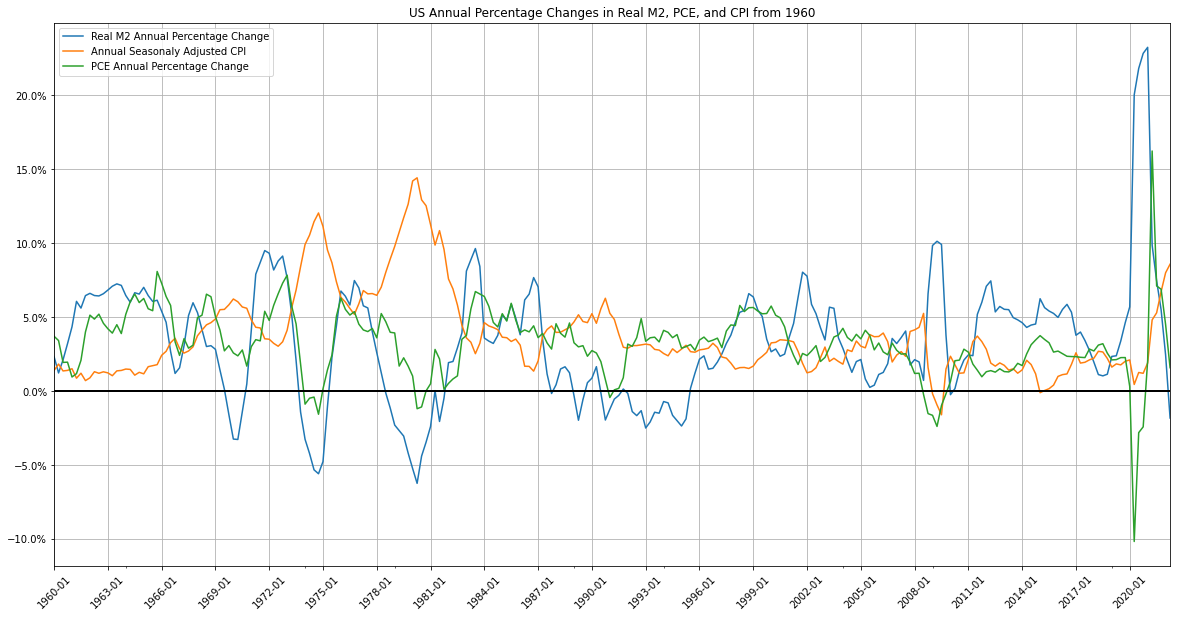

In [6]:
ax = m2_pce_cpi.plot(figsize=(20,10), grid=True, title=GRAPH_TITLE,
                     xticks=m2_pce_cpi.index[::12], xlabel='', rot=45)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.axhline(xmin=m2_pce_cpi.index[0], xmax=m2_pce_cpi.index[-1], lw=2, c='k')
_ = ax.set_xticklabels(list(map(lambda x: x.strftime('%Y-%m'), m2_pce_cpi.index[::12])))

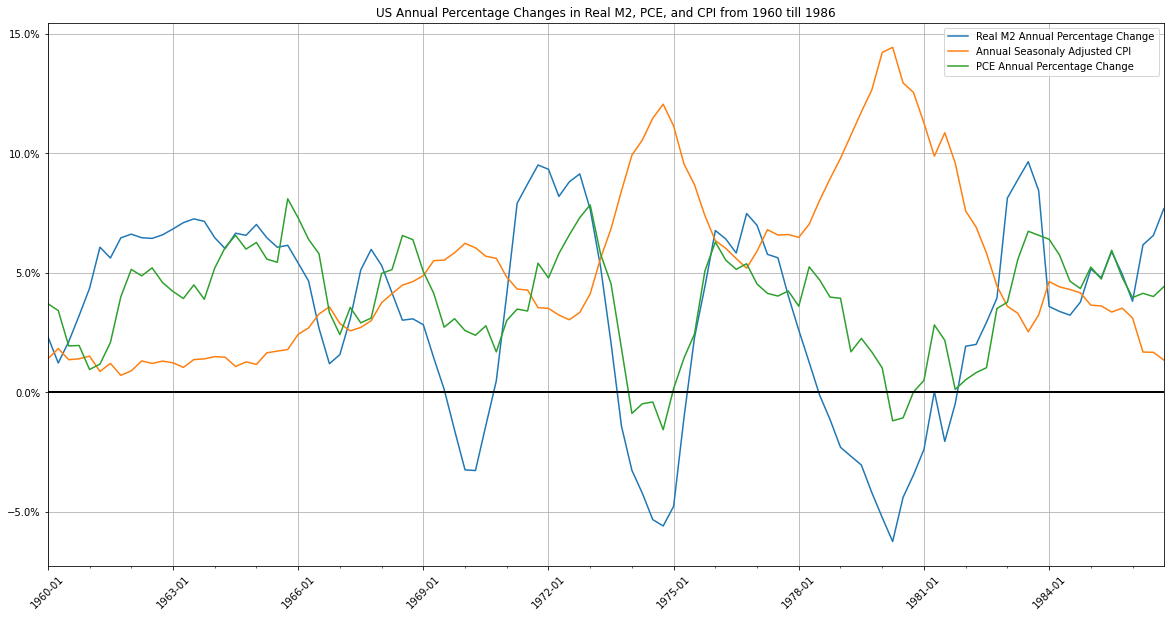

In [7]:
m2_pce_cpi_85 = m2_pce_cpi.loc[:'1986']
ax = m2_pce_cpi_85.plot(figsize=(20,10), grid=True,
                        title=GRAPH_TITLE + ' till ' + m2_pce_cpi_85.index[-1].strftime('%Y'),
                        xticks=m2_pce_cpi_85.index[::12], xlabel='', rot=45)#, yticks=np.arange(0, 20, 2.5))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.axhline(xmin=m2_pce_cpi_85.index[0], xmax=m2_pce_cpi_85.index[-1], lw=2, c='k')
_ = ax.set_xticklabels(list(map(lambda x: x.strftime('%Y-%m'), m2_pce_cpi_85.index[::12])))

#### Correlations
Increases in inflation correlate almost perfectly with a reduction in real money supply, follwed by a decrease in the personal consumption expenditures with lag of a quarter:

In [8]:
m2_pce_cpi_85.corr()

,Real M2 Annual Percentage Change,Annual Seasonaly Adjusted CPI,PCE Annual Percentage Change
Real M2 Annual Percentage Change,1.000000,-0.809814,0.739179
Annual Seasonaly Adjusted CPI,-0.809814,1.000000,-0.625816
PCE Annual Percentage Change,0.739179,-0.625816,1.000000


Shifting PCE by a quarter ahead shows that it negative correlation with CPI increases further:

In [9]:
pce = m2_pce_cpi_85.loc[:, 'PCE Annual Percentage Change']
m2_pce_cpi_85.iloc[:, :2].corrwith(pce.shift(-1))

Real M2 Annual Percentage Change    0.805586
Annual Seasonaly Adjusted CPI      -0.656020
dtype: float64

Zomming in on the last 5 years. Will the history repeat itself?

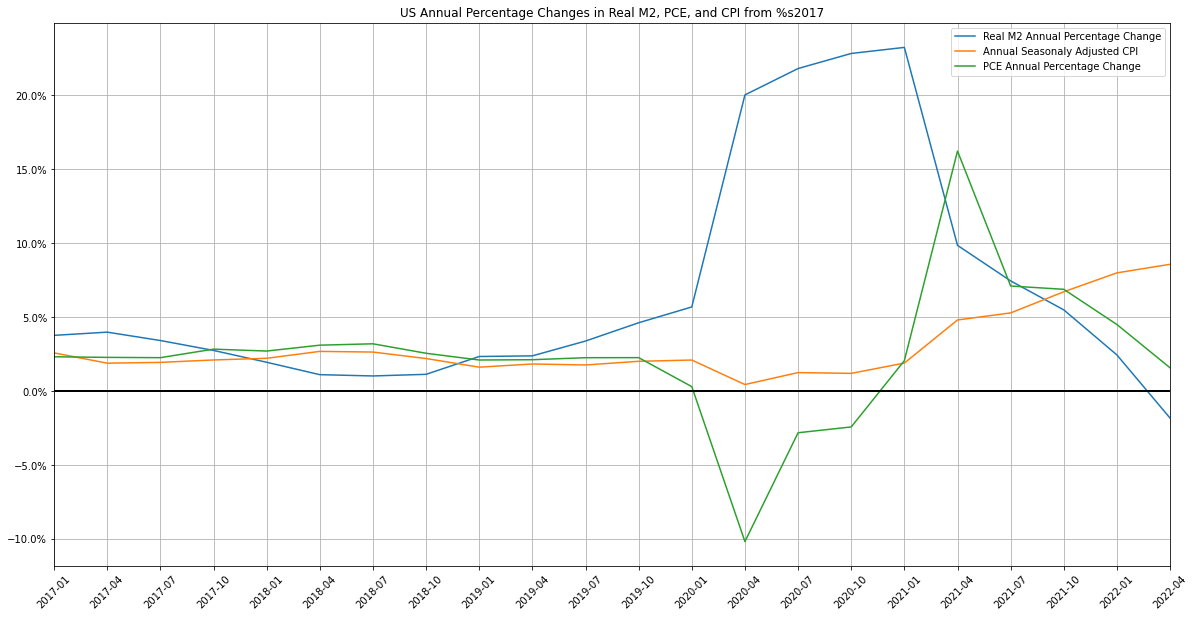

In [11]:
m2_pce_cpi_2017 = m2_pce_cpi.loc['2017':]
ax = m2_pce_cpi_2017.plot(figsize=(20,10), grid=True,
                        title='US Annual Percentage Changes in Real M2, PCE, and CPI from %s' + m2_pce_cpi_2017.index[0].strftime('%Y'),
                        xticks=m2_pce_cpi_2017.index[::], xlabel='', rot=45)#, yticks=np.arange(0, 20, 2.5))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.axhline(xmin=m2_pce_cpi_85.index[0], xmax=m2_pce_cpi_2017.index[-1], lw=2, c='k')
_ = ax.set_xticklabels(list(map(lambda x: x.strftime('%Y-%m'), m2_pce_cpi_2017.index[::])))